In [ ]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report, confusion_matrix

In [15]:
DATA_DIR = "C:/Users/Yakina/.cache/kagglehub/datasets/mdwaquarazam/agricultural-crops-image-classification/versions/1/Agricultural-crops"

In [16]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 674 images belonging to 30 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 155 images belonging to 30 classes.


In [20]:
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=100, validation_data=val_generator)

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.0426 - loss: 3.8653 - val_accuracy: 0.0258 - val_loss: 3.3928
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.0292 - loss: 3.4057 - val_accuracy: 0.0258 - val_loss: 3.3396
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.0541 - loss: 3.3526 - val_accuracy: 0.0774 - val_loss: 3.3077
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.0841 - loss: 3.2163 - val_accuracy: 0.0774 - val_loss: 3.1834
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1035 - loss: 3.1781 - val_accuracy: 0.1097 - val_loss: 3.1560
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1123 - loss: 3.0882 - val_accuracy: 0.1355 - val_loss: 3.0381
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.1158 - loss: 3.0828 - val_accuracy: 0.0968 - val_loss: 3.1730
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.1036 - loss: 3.2839 - val_accuracy: 0.1226 - v

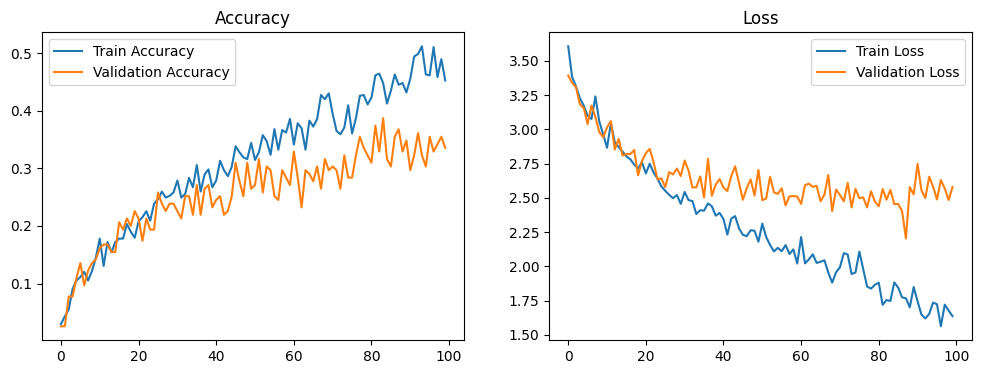

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [24]:
val_generator.reset()
preds = model.predict(val_generator)
y_true = val_generator.classes
y_pred = np.argmax(preds, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 628ms/step


In [25]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
                     precision    recall  f1-score   support

             Cherry       1.00      0.50      0.67         6
       Coffee-plant       0.25      0.40      0.31         5
           Cucumber       0.25      0.50      0.33         6
   Fox_nut(Makhana)       0.50      0.25      0.33         4
              Lemon       0.50      0.20      0.29         5
         Olive-tree       0.56      0.83      0.67         6
Pearl_millet(bajra)       0.25      0.29      0.27         7
      Tobacco-plant       0.25      0.17      0.20         6
             almond       0.00      0.00      0.00         4
             banana       0.50      0.50      0.50         6
           cardamom       0.50      0.50      0.50         4
             chilli       0.50      0.25      0.33         4
              clove       0.75      0.50      0.60         6
            coconut       0.33      0.40      0.36         5
             cotton       0.57      0.67      0.62         6


c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

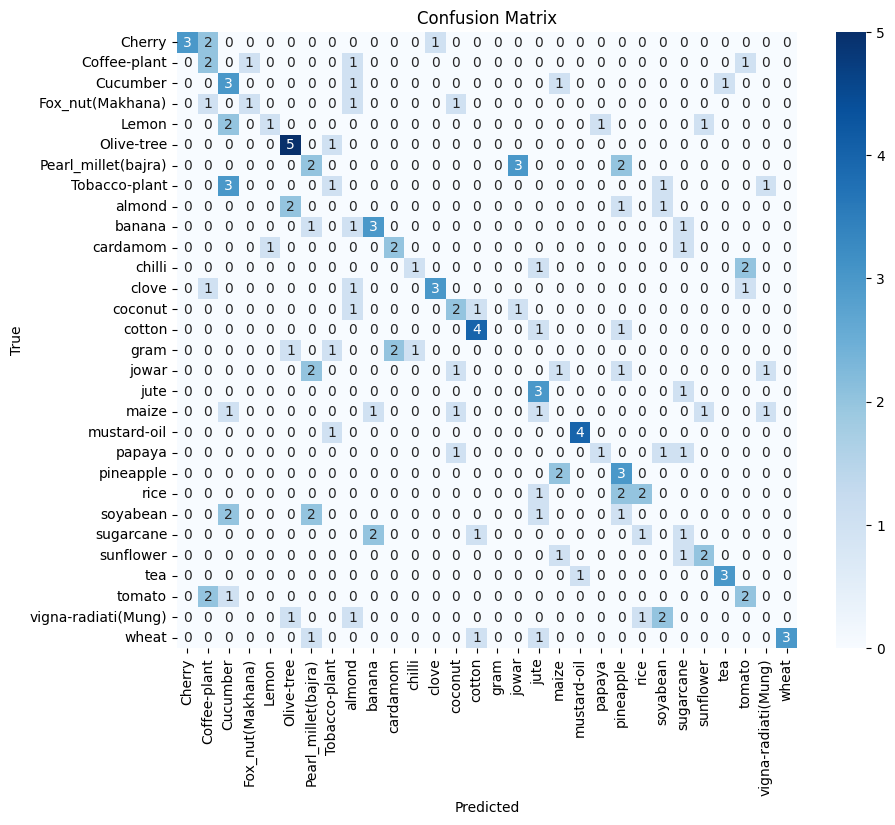

In [26]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()